[View in Colaboratory](https://colab.research.google.com/github/gresash/ML4AAD-Lab-SS2018/blob/master/Exercise_1_2_&_1_3.ipynb)

# Exercise 1.2 & 1.3
## Using SMAC to optimize functions
* Installation of SMAC and its Dependencies
* Exercise 1.2: Implementing the functions
* Exercise 1.3: Optimization of functions with SMAC

## Installation of SMAC and its Dependencies

In [1]:
!apt-get install swig -y
!pip install Cython
!pip install pyrfr==0.8.0 --no-cache --user
# hack to find pyrfr
import sys
sys.path.insert(0,"./.local/lib/python3.6/site-packages")

!pip install git+https://github.com/automl/SMAC3.git@development

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.10-1.2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
  Cloning https://github.com/automl/SMAC3.git (to revision development) to /tmp/pip-req-build-k5wt9lh1
  Running setup.py bdist_wheel for smac ... - \ | / - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_sf0_vg/wheels/f4/8d/4f/2ba4cb80693f139ea06c2e8541e012a93738fb56bc1e43a202
Successfully built smac


## Exercise 1.2: Define Functions to be optimized
* Bohachevsky
* Branin
* Camel
* Forrester
* Goldstein-Price

In [0]:
import numpy as np


def bohachevsky(x1, x2):
    optimum = 0
    val = x1 ** 2 + 2. * (x2 ** 2) - 0.3 * np.cos(3. * np.pi * x1) - 0.4 * np.cos(4. * np.pi * x2) + 0.7
    return np.log10(np.fabs(val - optimum))


def branin(x1, x2):
    a = 1
    b = 5.1 / (4 * (np.pi ** 2))
    c = 5 / np.pi
    r = 6
    s = 10
    t = 1 / (8 * np.pi)
    optimum = 0.397887

    val = a * ((x2 - b * (x1 ** 2) + c * x1 - r) ** 2) + s * (1 - t) * np.cos(x1) + s
    return np.log10(np.fabs(val - optimum))


def camel(x1, x2):
    optimum = -1.0316
    val = (4 - 2.1 * (x1 ** 2) + (x1 ** 4) / 3) * (x1 ** 2) + x1 * x2 + (-4 + 4 * (x2 ** 2)) * (x2 ** 2)
    return np.log10(np.fabs(val - optimum))


def forester(x):
    optimum = 0.78
    val = ((6 * x - 2) ** 2) * np.sin(12 * x - 4)
    return np.log10(np.fabs(val - optimum))


def goldstein_price(x1, x2):
    optimum = 3
    val = (1 + ((x1 + x2 + 1) ** 2) * (19 - 14 * x1 + 3 * (x1 ** 2) - 14 * x2 + 6 * x1 * x2 + 3 * (x2 ** 2))) * (30 + ((2 * x1 - 3 * x2) ** 2) * (18 - 32 * x1 + 12 * (x1 ** 2) + 48 * x2 - 36 * x1 * x2 + 27 * (x2 ** 2)))
    return np.log10(np.fabs(val - optimum))



## Optimize with SMAC -- SMAC interface

In [0]:
from smac.scenario.scenario import Scenario
from smac.facade.smac_facade import SMAC
from smac.facade.roar_facade import ROAR
import numpy as np
import matplotlib.pyplot as plt


def optimize_SMAC(funct, cs, maxfun, rnd):
    # Build a scenario
    scenario = Scenario({"run_obj": "quality",  # we optimize quality
                         "runcount-limit": maxfun,  # maximum number of function evaluations
                         "cs": cs,               # configuration space
                         "deterministic": "true"})
    # start SMAC
    smac = SMAC(scenario=scenario,
                rng=np.random.RandomState(rnd),
                tae_runner=funct)

    best_x = smac.optimize()
    cost = smac.get_tae_runner().run(best_x, 1)[1]

    return smac, cost, best_x


def optimize_ROAR(funct, cs, maxfun, rnd):
    # Build an scenario
    scenario = Scenario({"run_obj": "quality",  # we optimize quality
                         "runcount-limit": maxfun,  # maximum number of function evaluation
                         "cs": cs,                  # configuration space
                         "deterministic": "true"})

    # start SMAC
    smac = ROAR(scenario=scenario,
                rng=np.random.RandomState(rnd),
                tae_runner=funct)

    best_x = smac.optimize()
    cost = smac.get_tae_runner().run(best_x, 1)[1]

    return smac, cost, best_x


def get_history(smac):
    # get runhistory, all runs ever evaluated by smac
    runhistory = smac.get_runhistory()

    # extract x value and corresponding y value
    x_smac = []
    y_smac = []
    for entry in runhistory.data:  # iterate over data because it is an OrderedDict
        config_id = entry.config_id  # look up config id
        config = runhistory.ids_config[config_id]  # look up config
        y_ = runhistory.get_cost(config)  # get cost
        x_ = config["x1"]  # there is only one entry in our example
        x_smac.append(x_)
        y_smac.append(y_)
    x_smac = np.array(x_smac)
    y_smac = np.array(y_smac)
    return x_smac, y_smac


def get_history_2d(smac):
    # get runhistory, all runs ever evaluated by smac
    runhistory = smac.get_runhistory()

    # extract x value and corresponding y value
    x_smac = []
    y_smac = []
    z_smac = []
    for entry in runhistory.data:  # iterate over data because it is an OrderedDict
        config_id = entry.config_id  # look up config id
        config = runhistory.ids_config[config_id]  # look up config
        z_ = runhistory.get_cost(config)  # get cost
        x_ = config["x1"]  # there is only one entry in our example
        y_ = config["x2"]
        x_smac.append(x_)
        y_smac.append(y_)
        z_smac.append(z_)
    x_smac = np.array(x_smac)
    y_smac = np.array(y_smac)
    z_smac = np.array(z_smac)

    return x_smac, y_smac, z_smac


def run_Optimize_2d(cs, rnd_seed, funct, isSMAC, is2D, max_funct):
    if isSMAC:
        optimizer, cost, best_x = optimize_SMAC(funct, cs, max_funct, rnd_seed)
    else:
        optimizer, cost, best_x = optimize_ROAR(funct, cs, max_funct, rnd_seed)
    if is2D:
        x_smac, y_smac, z_smac = get_history_2d(optimizer)
        return x_smac, y_smac, z_smac
    else:
        x_smac, y_smac = get_history(optimizer)
        return x_smac, y_smac


In [0]:
def plot_function_values_2d(funct, x, y, x_smac, y_smac):
    z = funct(x, y).T
    plt.pcolormesh(x, y, z)
    plt.plot(x_smac, y_smac, 'bo')
    plt.show()


def plot_function_values(funct, x_points, x_smac, y_smac):
    y = list(map(funct, map(lambda x: x, x_points)))
    plt.plot(x_smac, y_smac, 'bo', x_points, y, 'k')
    plt.show()


def plot_log_scale(y_smac, maxfun, label, color):
    x = np.linspace(0, maxfun, num=maxfun)
    # Plotting
    ax = plt.subplot(111)

    plt.xlabel('#evaluations')
    plt.ylabel('Loss')

    # let's plot only the best function value at each time step
    y_median = np.zeros(maxfun)
    y_25th = np.zeros(maxfun)
    y_75th = np.zeros(maxfun)
    for id in range(maxfun):
        y_median[id] = np.percentile(y_smac[:id+1], 50)
        y_25th[id] = np.percentile(y_smac[:id+1], 25)
        y_75th[id] = np.percentile(y_smac[:id+1], 75)

    plt.plot(y_median, 'o', color=color)

    ax.step(y_median, 'k', where="post", label=label, color=color)
    ax.set_xscale("log")
    plt.fill_between(x, y_25th, y_75th, alpha=0.5, color=color, step='pre')



In [0]:
def bohachevsky_2d(x):
    x1 = float(x["x1"])
    x2 = float(x["x2"])
    optimum = 0
    val = x1 ** 2 + 2. * (x2 ** 2) - 0.3 * np.cos(3. * np.pi * x1) - 0.4 * np.cos(4. * np.pi * x2) + 0.7
    return np.log10(np.fabs(val - optimum))


def branin_2d(x):
    x1 = float(x["x1"])
    x2 = float(x["x2"])

    a = 1
    b = 5.1 / (4 * (np.pi ** 2))
    c = 5 / np.pi
    r = 6
    s = 10
    t = 1 / (8 * np. pi)
    optimum = 0.397887
    val = a * ((x2 - b * (x1 ** 2) + c * x1 - r) ** 2) + s * (1 - t) * np.cos(x1) + s
    return np.log10(np.fabs(val - optimum))


def camel_2d(x):
    x1 = float(x["x1"])
    x2 = float(x["x2"])
    optimum = -1.0316
    val = (4 - 2.1 * (x1 ** 2) + (x1 ** 4) / 3) * (x1 ** 2) + x1 * x2 + (-4 + 4 * (x2 ** 2)) * (x2 ** 2)
    return np.log10(np.fabs(val - optimum))


def forester_2(x):
    x = float(x["x1"])
    optimum = 0.78
    val = ((6 * x - 2) ** 2) * np.sin(12 * x - 4)
    return np.log10(np.fabs(val - optimum))


def goldstein_price_2d(x):
    x1 = float(x["x1"])
    x2 = float(x["x2"])
    optimum = 3
    val = (1 + ((x1 + x2 + 1) ** 2) * (19 - 14 * x1 + 3 * (x1 ** 2) - 14 * x2 + 6 * x1 * x2 + 3 * (x2 ** 2))) * (30 + ((2 * x1 - 3 * x2) ** 2) * (18 - 32 * x1 + 12 * (x1 ** 2) + 48 * x2 - 36 * x1 * x2 + 27 * (x2 ** 2)))
    return np.log10(np.fabs(val - optimum))


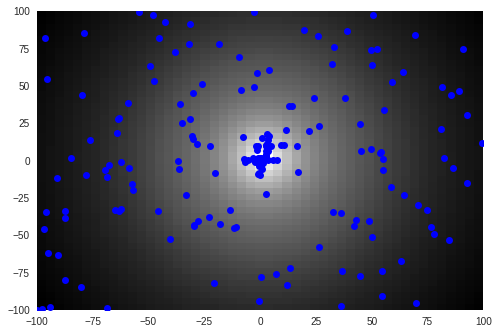

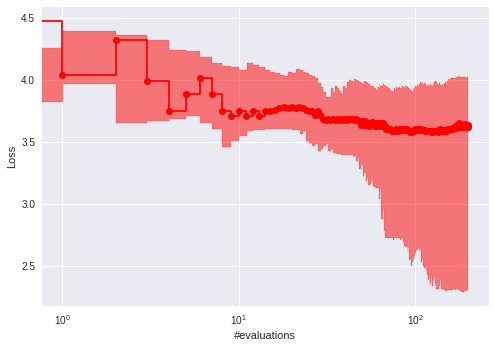

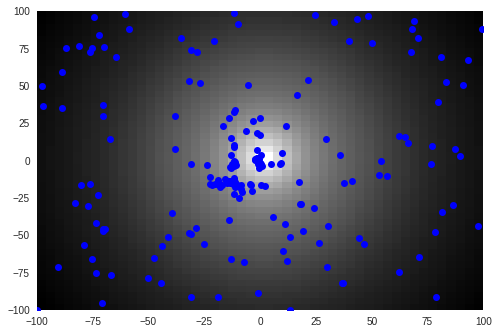

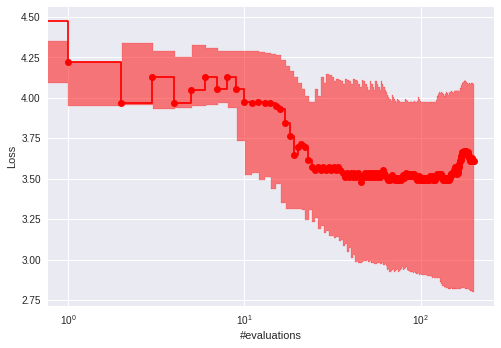

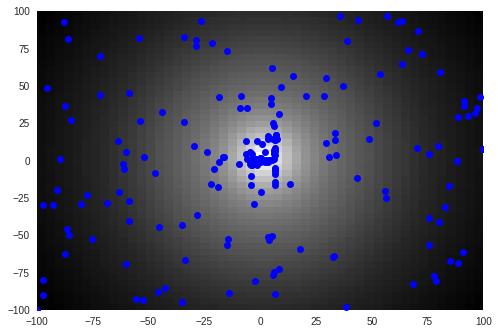

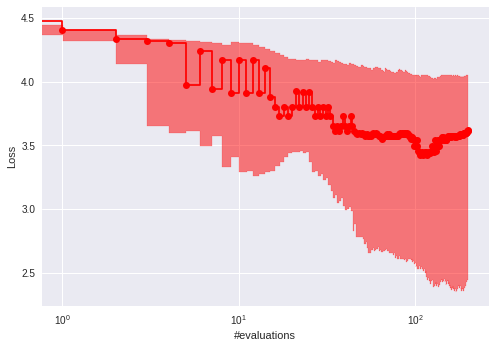

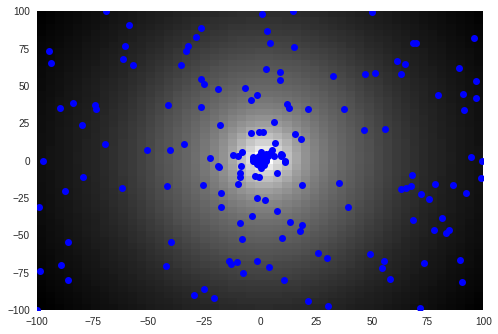

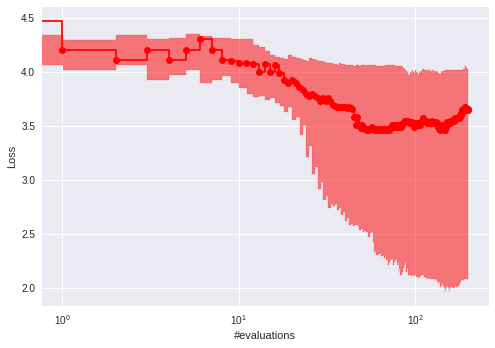

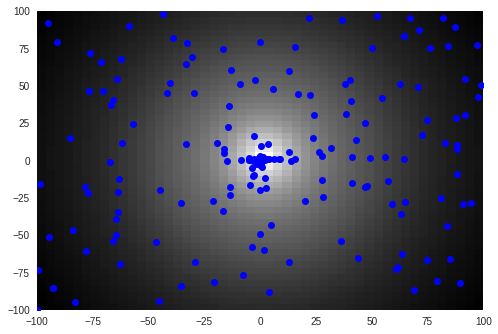

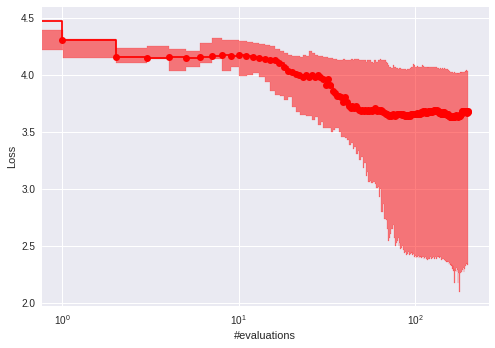

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


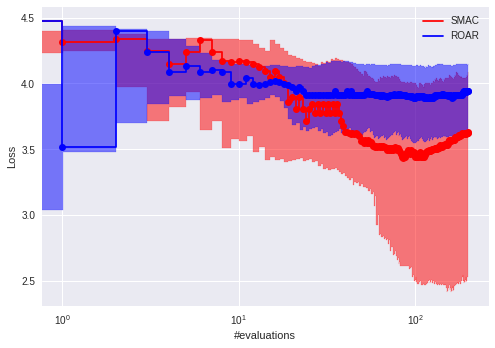

In [19]:
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter
# Build configuration space
# Bohachevsky
cs = ConfigurationSpace(seed=1234)
# The two parameters are Continuous
x1 = UniformFloatHyperparameter(name="x1", lower=-100, upper=100, default_value=-100)
x2 = UniformFloatHyperparameter(name="x2", lower=-100, upper=100, default_value=-100)

# add parameters to config space
cs.add_hyperparameters([x1, x2])
MAX_FUN = 200
x_points = np.linspace(-100, 100)
y_points = np.linspace(-100, 100)
X, Y = np.meshgrid(x_points, y_points)
x_smac = []
y_smac = []
z_smac = []
x_roar = []
y_roar = []
z_roar = []

for i in np.random.randint(10000, size=5):
    x_smac, y_smac, z_smac = run_Optimize_2d(cs, i, bohachevsky_2d, True, True, MAX_FUN)
    plot_function_values_2d(bohachevsky, X, Y, x_smac, y_smac)
    plt.show()
    plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
    plt.show()


x_smac, y_smac, z_smac = run_Optimize_2d(cs, 12345, bohachevsky_2d, True, True, MAX_FUN)
plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
x_roar, y_roar, z_roar = run_Optimize_2d(cs, 12345, bohachevsky_2d, False, True, MAX_FUN)
plot_log_scale(z_roar, MAX_FUN, label="ROAR", color="blue")
plt.legend()
plt.show()


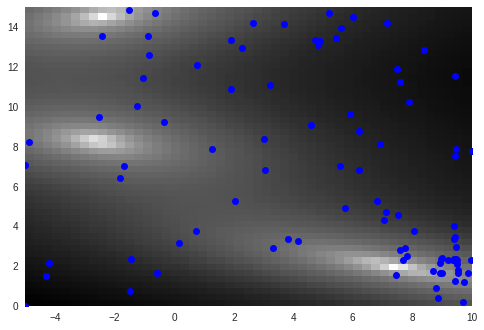

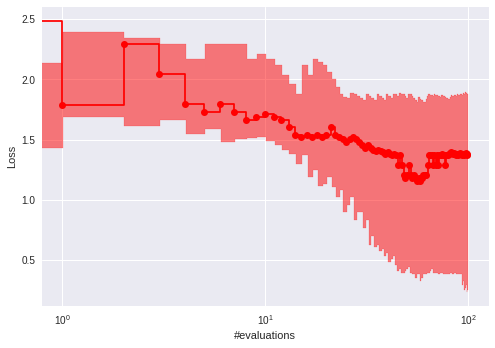

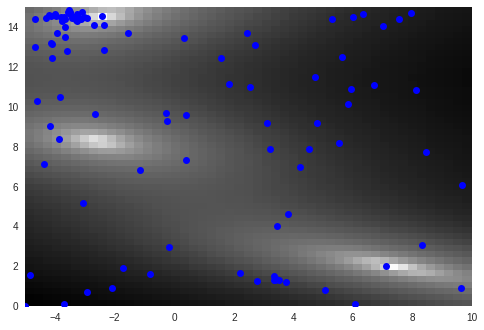

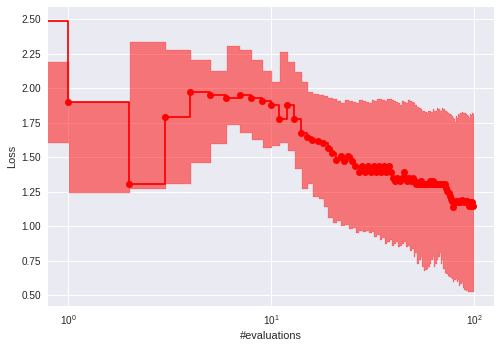

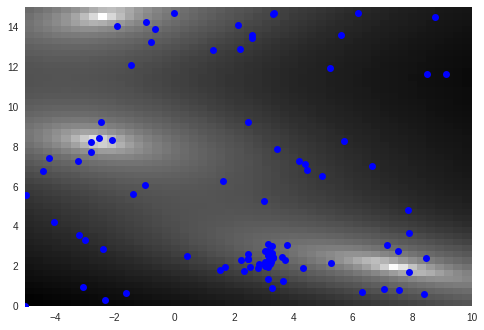

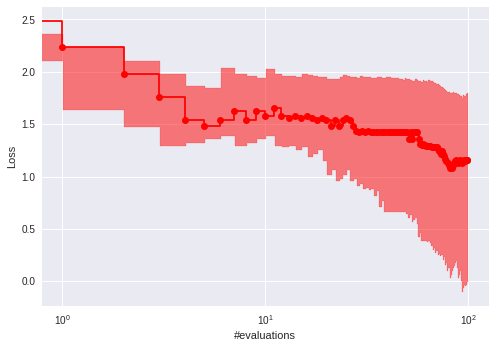

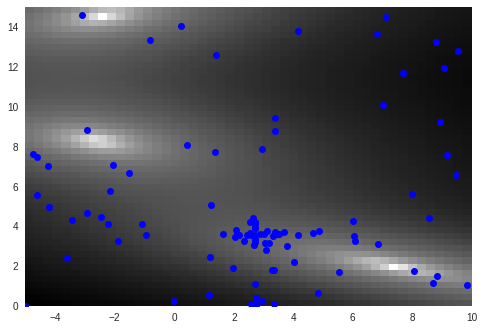

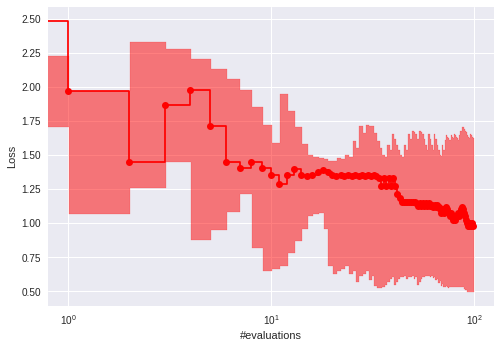

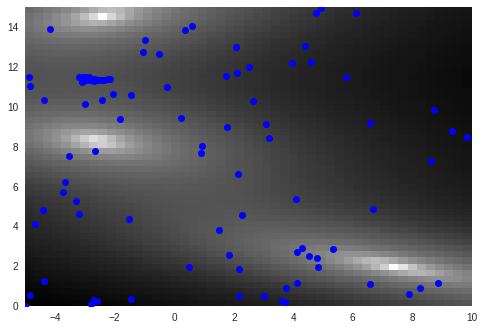

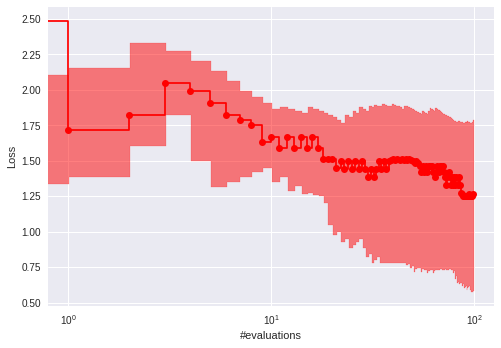

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


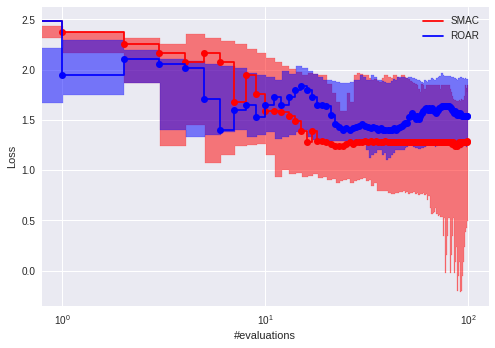

In [20]:
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter

# Build configuration space
# Branin
cs = ConfigurationSpace(seed=1234)
# The two parameters are Continuous
x1 = UniformFloatHyperparameter(name="x1", lower=-5, upper=10, default_value=-5)
x2 = UniformFloatHyperparameter(name="x2", lower=0, upper=15, default_value=0)
# add parameters to config space
cs.add_hyperparameters([x1, x2])
MAX_FUN = 100
x_points = np.linspace(-5, 10)
y_points = np.linspace(0, 15)
X, Y = np.meshgrid(x_points, y_points)
x_smac = []
y_smac = []
z_smac = []
x_roar = []
y_roar = []
z_roar = []


for i in np.random.randint(10000, size=5):
    x_smac, y_smac, z_smac = run_Optimize_2d(cs, i, branin_2d, True, True, MAX_FUN)
    plot_function_values_2d(branin, X, Y, x_smac, y_smac)
    plt.show()
    plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
    plt.show()


x_smac, y_smac, z_smac = run_Optimize_2d(cs, 12345, branin_2d, True, True, MAX_FUN)
plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
x_roar, y_roar, z_roar = run_Optimize_2d(cs, 12345, branin_2d, False, True, MAX_FUN)
plot_log_scale(z_roar, MAX_FUN, label="ROAR", color="blue")
plt.legend()
plt.show()


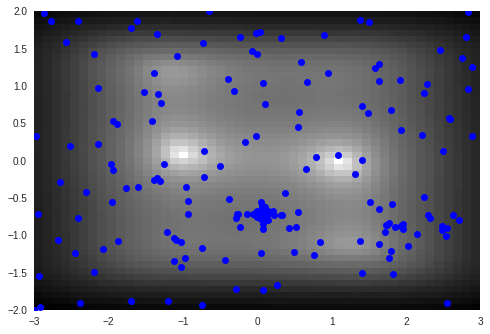

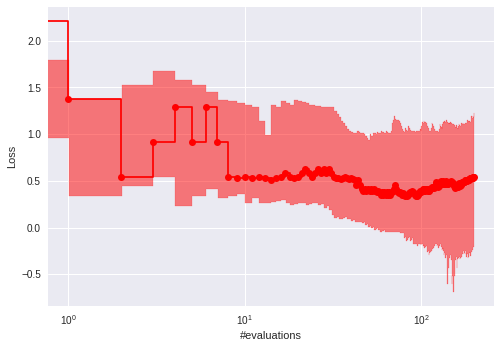

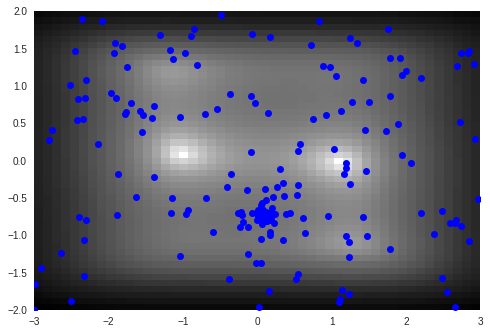

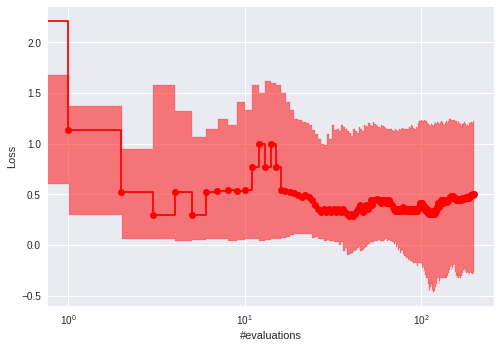

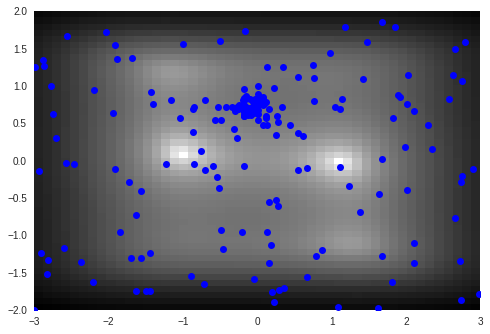

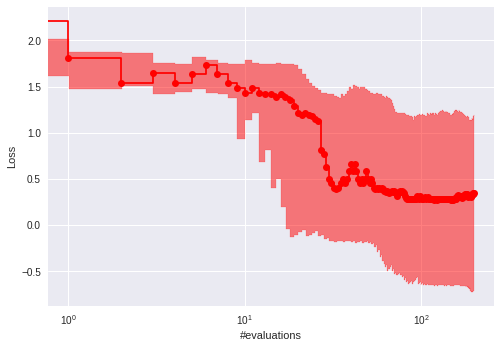

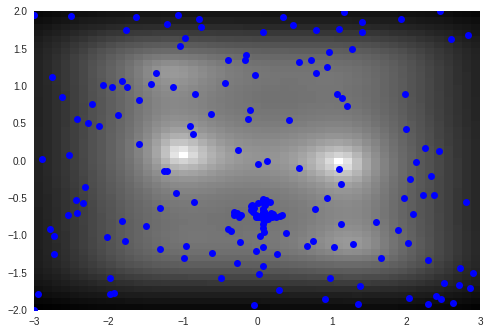

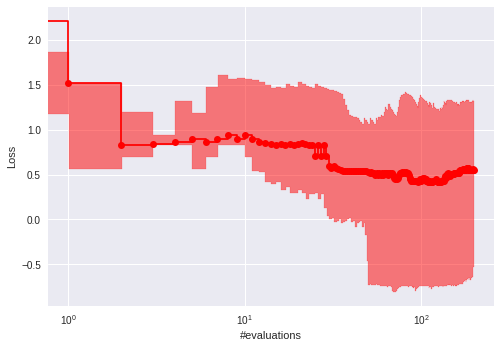

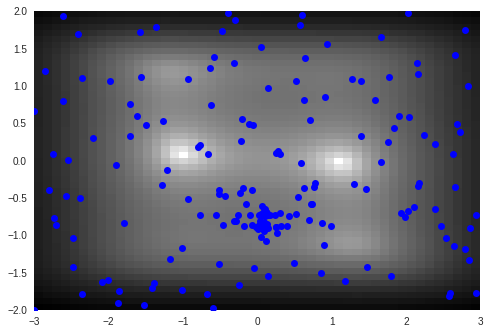

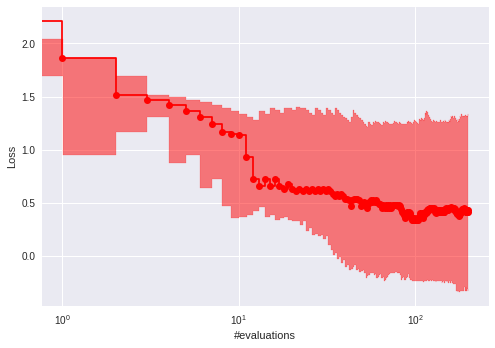

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


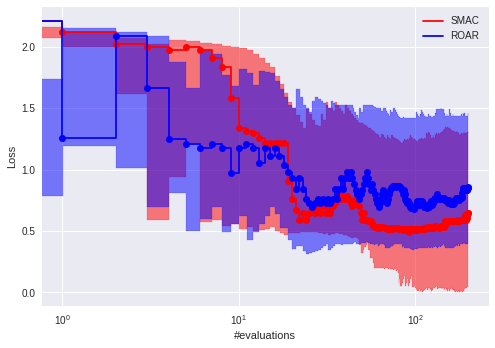

In [21]:
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter

# Build configuration space
# Camel
cs = ConfigurationSpace(seed=1234)
# The two parameters are Continuous
x1 = UniformFloatHyperparameter(name="x1", lower=-3, upper=3, default_value=-3)
x2 = UniformFloatHyperparameter(name="x2", lower=-2, upper=2, default_value=-2)
MAX_FUN = 200
# add parameters to config space
cs.add_hyperparameters([x1, x2])

x_points = np.linspace(-3, 3)
y_points = np.linspace(-2, 2)
X, Y = np.meshgrid(x_points, y_points)
x_smac = []
y_smac = []
z_smac = []
x_roar = []
y_roar = []
z_roar = []


for i in np.random.randint(10000, size=5):
    x_smac, y_smac, z_smac = run_Optimize_2d(cs, i, camel_2d, True, True, MAX_FUN)
    plot_function_values_2d(camel, X, Y, x_smac, y_smac)
    plt.show()
    plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
    plt.show()


x_smac, y_smac, z_smac = run_Optimize_2d(cs, 12345, camel_2d, True, True, MAX_FUN)
plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
x_roar, y_roar, z_roar = run_Optimize_2d(cs, 12345, camel_2d, False, True, MAX_FUN)
plot_log_scale(z_roar, MAX_FUN, label="ROAR", color="blue")
plt.legend()
plt.show()


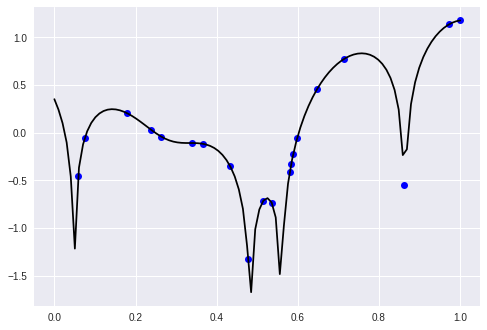

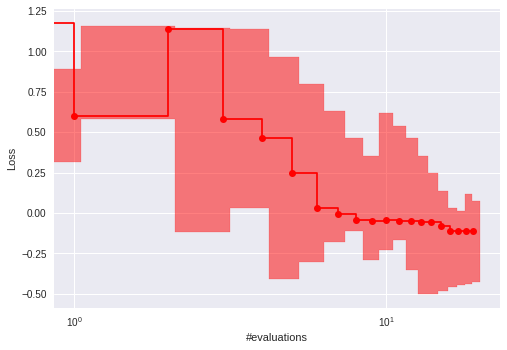

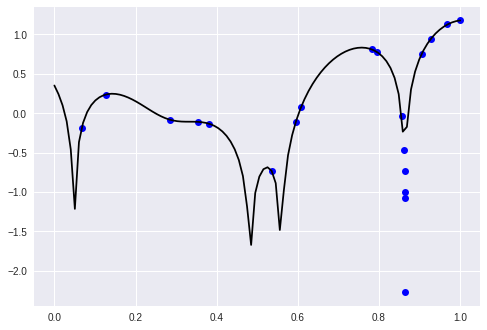

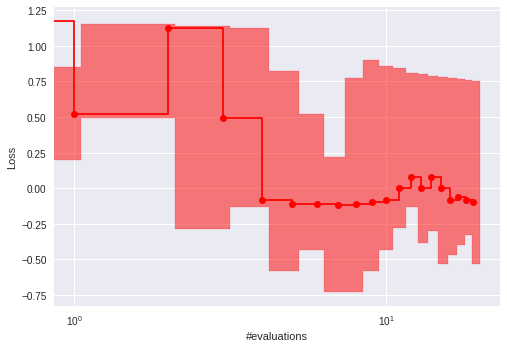

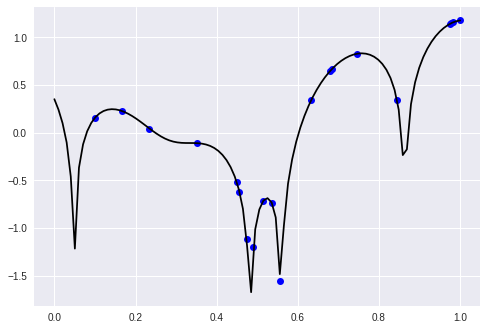

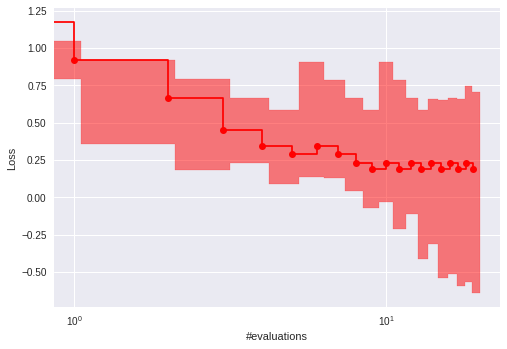

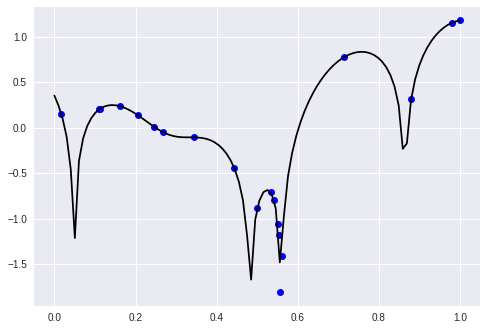

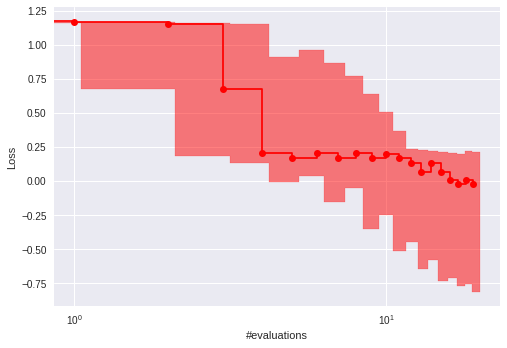

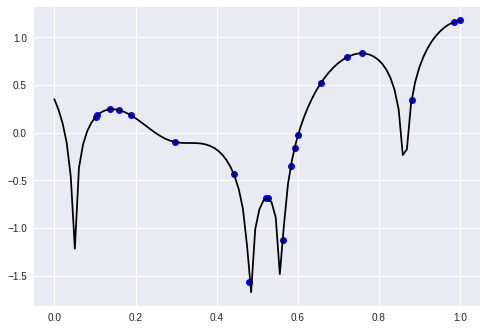

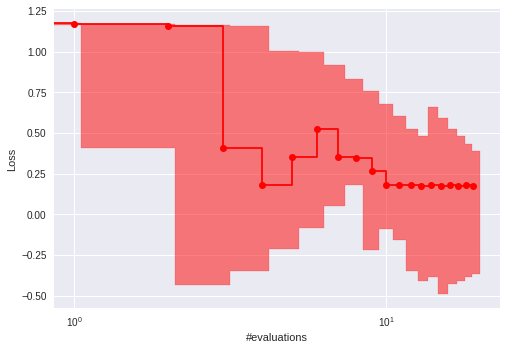

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


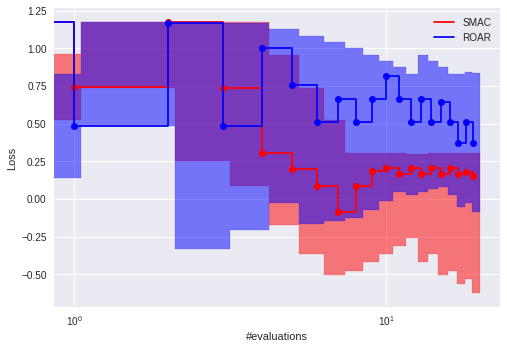

In [22]:
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter

# Build configuration space
# Forrester
cs = ConfigurationSpace(seed=1234)
# the parameter is Continuous
x1 = UniformFloatHyperparameter(name="x1", lower=0, upper=1, default_value=1)

# add parameter to config space
cs.add_hyperparameters([x1])
MAX_FUN = 20
x_points = np.linspace(start=0, stop=1, num=100)
x_smac = []
y_smac = []

x_roar = []
y_roar = []

for i in np.random.randint(10000, size=5):
    x_smac, y_smac = run_Optimize_2d(cs, i, forester_2, True, False, MAX_FUN)
    plot_function_values(forester, x_points, x_smac, y_smac)
    plt.show()
    plot_log_scale(y_smac, MAX_FUN, label="SMAC", color="red")
    plt.show()

x_smac, y_smac = run_Optimize_2d(cs, 12345, forester_2, True, False, MAX_FUN)
plot_log_scale(y_smac, MAX_FUN, label="SMAC", color="red")
x_roar, y_roar = run_Optimize_2d(cs, 12345, forester_2, False, False, MAX_FUN)
plot_log_scale(y_roar, MAX_FUN, label="ROAR", color="blue")
plt.legend()
plt.show()


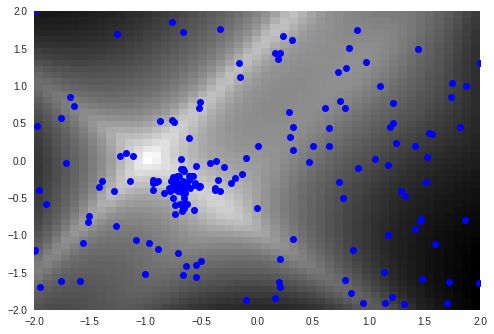

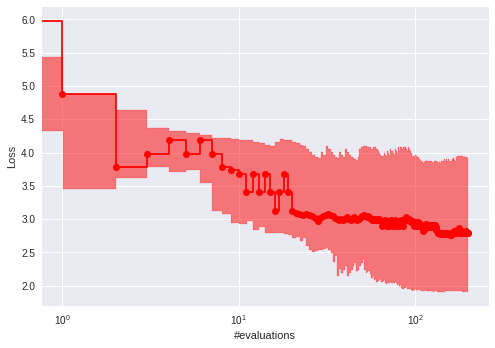

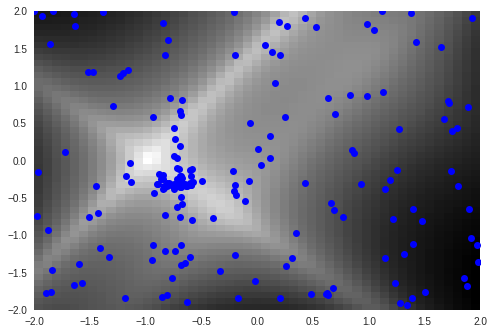

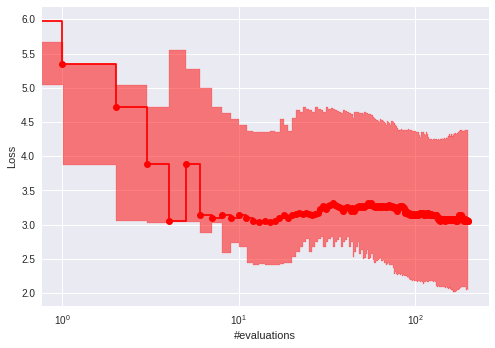

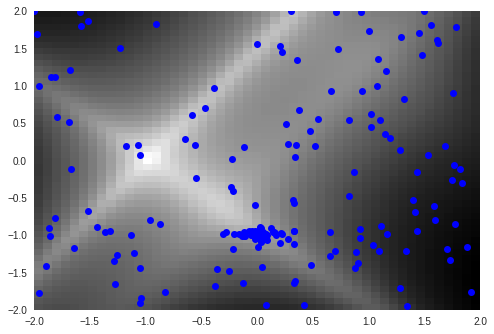

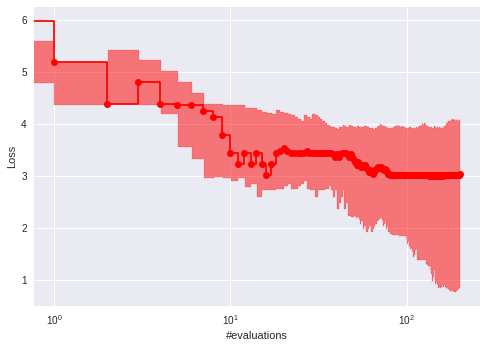

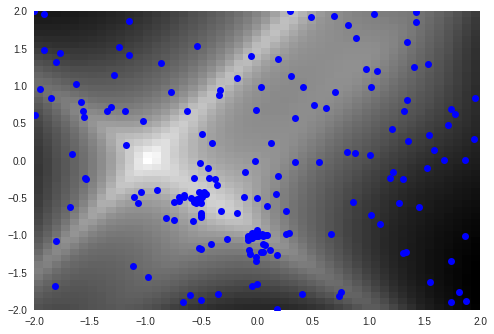

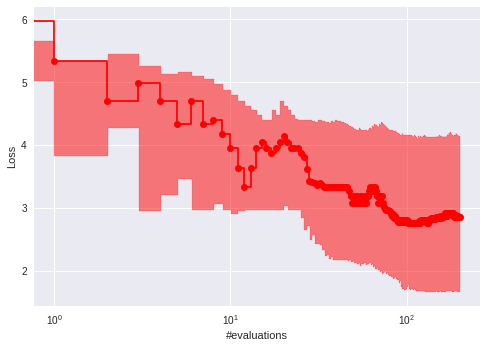

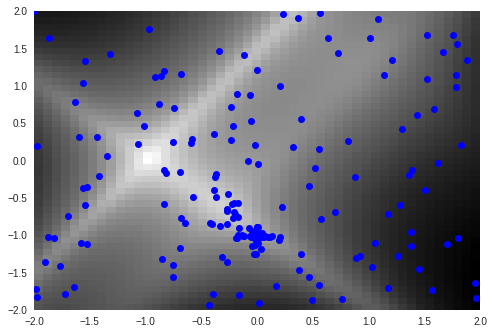

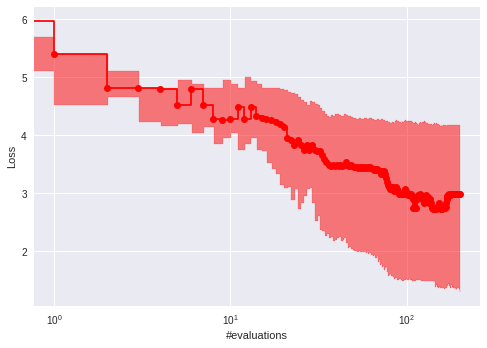

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


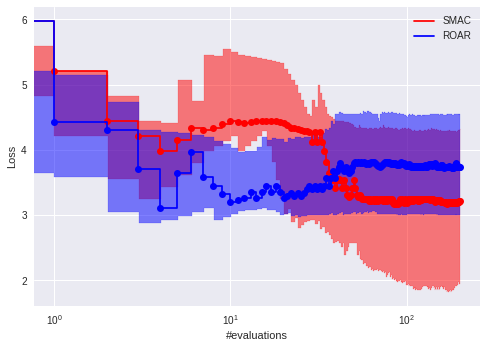

In [23]:
# Build configuration space
# Goldstein-Price
cs = ConfigurationSpace(seed=1234)
# Both parameters are Continuous
x1 = UniformFloatHyperparameter(name="x1", lower=-2, upper=2, default_value=-2)
x2 = UniformFloatHyperparameter(name="x2", lower=-2, upper=2, default_value=2)

# add parameters to config space
cs.add_hyperparameters([x1, x2])

MAX_FUN = 200
x_points = np.linspace(-2, 2)
y_points = np.linspace(-2, 2)
X, Y = np.meshgrid(x_points, y_points)

x_smac = []
y_smac = []
z_smac = []
x_roar = []
y_roar = []
z_roar = []


for i in np.random.randint(10000, size=5):
    x_smac, y_smac, z_smac = run_Optimize_2d(cs, i, goldstein_price_2d, True, True, MAX_FUN)
    plot_function_values_2d(goldstein_price, X, Y, x_smac, y_smac)
    plt.show()
    plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
    plt.show()


x_smac, y_smac, z_smac = run_Optimize_2d(cs, 12345, goldstein_price_2d, True, True, MAX_FUN)
plot_log_scale(z_smac, MAX_FUN, label="SMAC", color="red")
x_roar, y_roar, z_roar = run_Optimize_2d(cs, 12345, goldstein_price_2d, False, True, MAX_FUN)
plot_log_scale(z_roar, MAX_FUN, label="ROAR", color="blue")
plt.legend()
plt.show()
